### Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
df=pd.read_csv("E:\\Data Science\\Clustering , Hierarchical\\EastWestAirlines.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Data Science\\Clustering , Hierarchical\\EastWestAirlines.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Using Hierarchical Clustering

In [5]:
#Standardized data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_df=scaler.fit_transform(df)

In [6]:
std_df=pd.DataFrame(std_df,columns=df.columns)
std_df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919
3998,1.728543,-0.700508,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,-1.317541,-0.766919


In [7]:
#creat dendrogram
#dendro=sch.dendrogram(sch.linkage(std_df,method='single'))#computationaly intensive(it take to much time for run)

In [8]:
#creat cluster (here k is subjective)
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='single')
y_hc=hc.fit_predict(std_df)

In [9]:
cluster=pd.DataFrame(y_hc,columns=['cluster'])
#cluster

In [10]:
std_df['h_clusterid1']=hc.labels_
std_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid1
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0


In [11]:
std_df.groupby(['h_clusterid1']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid1,,,,,,,,,,,,
0,3953,3953,3953,3953,3953,3953,3953,3953,3953,3953,3953,3953
1,28,28,28,28,28,28,28,28,28,28,28,28
2,15,15,15,15,15,15,15,15,15,15,15,15
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1


### Conclusion
#### Only in cluster id 0 MOST Number of persons got Award

In [12]:
#OTHER distances
#creat cluster (here k is subjective)
hc1=AgglomerativeClustering(n_clusters=6,affinity='manhattan',linkage='complete')
y_hc1=hc1.fit_predict(std_df)

In [13]:
std_df['h_clusterid2']=hc1.labels_
std_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid1,h_clusterid2
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,1
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0,1
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0,1
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0,1
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0,1


In [14]:
std_df.groupby(['h_clusterid2']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid1
h_clusterid2,,,,,,,,,,,,,
0,103,103,103,103,103,103,103,103,103,103,103,103,103
1,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812
2,15,15,15,15,15,15,15,15,15,15,15,15,15
3,4,4,4,4,4,4,4,4,4,4,4,4,4
4,43,43,43,43,43,43,43,43,43,43,43,43,43
5,22,22,22,22,22,22,22,22,22,22,22,22,22


### Conclusion
#### Only in cluster id 1 MOST Number of persons got Award

In [15]:
#OTHER distances
#creat cluster (here k is subjective)
hc2=AgglomerativeClustering(n_clusters=6,affinity='minkowski',linkage='complete')
y_hc2=hc2.fit_predict(std_df)

In [16]:
std_df['h_clusterid3']=hc2.labels_
std_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid1,h_clusterid2,h_clusterid3
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,1,0
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0,1,0
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0,1,0
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0,1,0
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0,1,0


In [17]:
std_df.groupby(['h_clusterid3']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid1,h_clusterid2
h_clusterid3,,,,,,,,,,,,,,
0,3861,3861,3861,3861,3861,3861,3861,3861,3861,3861,3861,3861,3861,3861
1,65,65,65,65,65,65,65,65,65,65,65,65,65,65
2,15,15,15,15,15,15,15,15,15,15,15,15,15,15
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,44,44,44,44,44,44,44,44,44,44,44,44,44,44
5,12,12,12,12,12,12,12,12,12,12,12,12,12,12


### Conclusion
#### Only in cluster id 0 MOST Number of persons got Award

In [18]:
#OTHER distances
#creat cluster (here k is subjective)
hc3=AgglomerativeClustering(n_clusters=6,affinity='hamming',linkage='complete')
y_hc3=hc3.fit_predict(std_df)

In [19]:
std_df['h_clusterid4']=hc3.labels_
std_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid1,h_clusterid2,h_clusterid3,h_clusterid4
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,1,0,0
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0,1,0,0
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0,1,0,0
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0,1,0,0
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0,1,0,2


In [20]:
std_df.groupby(['h_clusterid4']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid1,h_clusterid2,h_clusterid3
h_clusterid4,,,,,,,,,,,,,,,
0,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
1,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399
2,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520
3,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
4,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
5,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


### Conclusion
#### Only in cluster id 2 MOST Number of persons got Award

# Using K-Mean clustering

In [21]:
from sklearn.cluster import KMeans
#First choose k(no. of clusters)
wcss=[]
for i in range(1,35):
    kmean=KMeans(n_clusters=i,random_state=22)
    kmean.fit(std_df)
    wcss.append(kmean.inertia_)

Text(0, 0.5, 'WCSS')

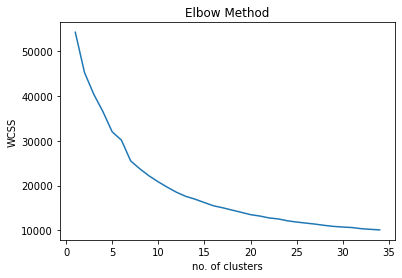

In [22]:
plt.plot(range(1,35),wcss)
plt.title("Elbow Method");plt.xlabel("no. of clusters");plt.ylabel("WCSS")

#### From Elbow graph we can choose the value of k in between 8 to 12

In [23]:
#Build cluster algorithm
clusters_new=KMeans(8,random_state=2)
clusters_new.fit(std_df)

KMeans(random_state=2)

In [24]:
clusters_new.labels_

array([3, 3, 3, ..., 6, 6, 0])

In [25]:
df['clusterid-new']=clusters_new.labels_
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid-new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [26]:
df.groupby(['clusterid-new']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid-new,,,,,,,,,,,,
0,794,794,794,794,794,794,794,794,794,794,794,794
1,59,59,59,59,59,59,59,59,59,59,59,59
2,851,851,851,851,851,851,851,851,851,851,851,851
3,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
4,93,93,93,93,93,93,93,93,93,93,93,93
5,43,43,43,43,43,43,43,43,43,43,43,43
6,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
7,15,15,15,15,15,15,15,15,15,15,15,15


In [27]:
df.groupby(['clusterid-new']).agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid-new,,,,,,,,,,,,
0,2840.047859,31369.962217,59.424433,1.094458,1.000000,1.000000,2464.738035,3.894207,152.503778,0.409320,2625.090680,0.074307
1,2067.983051,117723.915254,5442.728814,2.033898,1.000000,1.000000,19362.152542,12.576271,1039.525424,3.050847,3949.440678,0.559322
2,1458.424207,134898.150411,71.096357,4.122209,1.000000,1.001175,49073.406580,20.177438,480.406580,1.475911,5101.903643,0.686251
3,859.855620,62828.635659,55.882752,1.488372,1.000000,1.000969,7044.395349,8.753876,258.086240,0.805233,6142.322674,0.323643
4,1624.096774,236675.849462,596.688172,2.279570,1.000000,1.000000,36629.956989,31.172043,6789.236559,19.580645,4889.129032,0.892473
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,2947.991906,50177.429856,28.922662,1.699640,1.000000,1.000899,9878.074640,11.045863,286.079137,0.864209,2497.861511,0.326439
7,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


# Cnclusion

#### In cluster id 2 MOST Number of miles eligible for award travel(Balance)
#### In cluster id 5 MORE Number of miles counted as qualifying for Topflight status(Qual_miles)
#### In cluster id 3 maximum Number of miles earned with freq. flyer credit card in the past 12 months(cc1_miles)
#### In cluster id 7 more Number of miles earned with Rewards credit card in the past 12 months(cc2_miles)
#### In cluster id 6 most Number of miles earned with Small Business credit card in the past 12 months(cc3_miles)
#### In cluster id 6 MAX Number of miles earned from non-flight bonus transactions in the past 12 months(Bonus_miles)
#### In cluster id 2 more Number of non-flight bonus transactions in the past 12 months(Bonus_trans)
#### In cluster id 2 most Number of flight miles in the past 12 months(Flight_miles_12mo)
#### In cluster id 2 maximum Number of flight transactions in the past 12 months(Flight_trans_12)
#### In cluster id 3 more Number of days since enrolled in flier program
#### In cluster id  2 Maximum  Number of person got award flight (free flight)

# Using DBSCAN clustering

In [28]:
#Build a cluster
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=2,min_samples=12)
dbscan.fit(std_df)

DBSCAN(eps=2, min_samples=12)

In [29]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 2], dtype=int64)

In [30]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [31]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [32]:
df=pd.concat([df,cl],axis=1)

In [33]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid-new,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6,0


In [34]:
df.groupby(['cluster']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid-new
cluster,,,,,,,,,,,,,
-1,316,316,316,316,316,316,316,316,316,316,316,316,316
0,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
1,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257
2,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
3,15,15,15,15,15,15,15,15,15,15,15,15,15


### Conclusion
#### Approxi. 8% outliers so DBSCAN will work(cluster id -1)
#### Only in cluster id 0 MOST Number of persons got Award